In [1]:
# module imports
import pandas as pd
from pathlib import Path

In [18]:
files = Path('./Clean Datasets').glob('*.csv')
df = pd.DataFrame()

for file in files:
    if str(file).find('country_climate_disasters_clean') < 1:
        curr_df = pd.read_csv(file)

        if df.empty:
            df = curr_df
        else:
            df = df.merge(curr_df, on='Year', how='inner')

df.drop(columns=['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm', 'Wildfire'], inplace=True)
df.fillna(df.mean(), inplace=True)
df.describe()

,Year,TOTAL,CO PPM,CO Percent,Carbon stocks in forests,Forest area,Index of carbon stocks in forests,Index of forest extent,Land area,Share of forest area,...,Vanuatu,"Venezuela, Rep. Bolivariana de",Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World_y,"Yemen, Rep. of",Zambia,Zimbabwe
count,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,2.900000e+01,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000
mean,2006.000000,304.551724,382.818563,0.526897,294855.059428,4.131409e+06,99.294906,97.883128,1.300968e+07,31.756821,...,0.578517,0.764517,0.710172,0.602414,0.734517,1.313276,0.981345,1.070000e-01,0.652517,0.320586
std,8.514693,61.330246,17.615761,0.150010,928.749340,4.760892e+04,0.312764,1.127971,1.423159e+04,0.399391,...,0.345287,0.279873,0.452479,0.411114,0.684435,0.411943,0.365750,4.237029e-17,0.396632,0.451548
min,1992.000000,167.000000,356.545833,0.187500,293654.725000,4.058927e+06,98.890683,96.165863,1.298901e+07,31.159624,...,-0.281000,0.298000,0.001000,-0.307000,-1.045000,0.315000,0.184000,1.070000e-01,-0.117000,-0.417000
25%,1999.000000,287.000000,368.540000,0.463333,294194.582900,4.092844e+06,99.072485,96.969426,1.299595e+07,31.421353,...,0.402000,0.545000,0.332000,0.361000,0.519000,0.942000,0.834000,1.070000e-01,0.362000,0.004000
50%,2006.000000,314.000000,382.090833,0.522500,294551.667100,4.127010e+06,99.192736,97.778913,1.301345e+07,31.709619,...,0.573000,0.760000,0.722000,0.686000,0.735000,1.356000,0.993000,1.070000e-01,0.711000,0.232000
75%,2013.000000,354.000000,396.737500,0.605833,295374.528800,4.165888e+06,99.469841,98.700026,1.302568e+07,32.060031,...,0.777000,0.933000,1.043000,0.827000,1.043000,1.510000,1.195000,1.070000e-01,0.891000,0.685000
max,2020.000000,407.000000,414.210833,0.849167,296948.829100,4.220757e+06,100.000000,100.000000,1.302696e+07,32.490001,...,1.226000,1.350000,1.811000,1.379000,2.326000,2.204000,1.711000,1.070000e-01,1.450000,1.270000


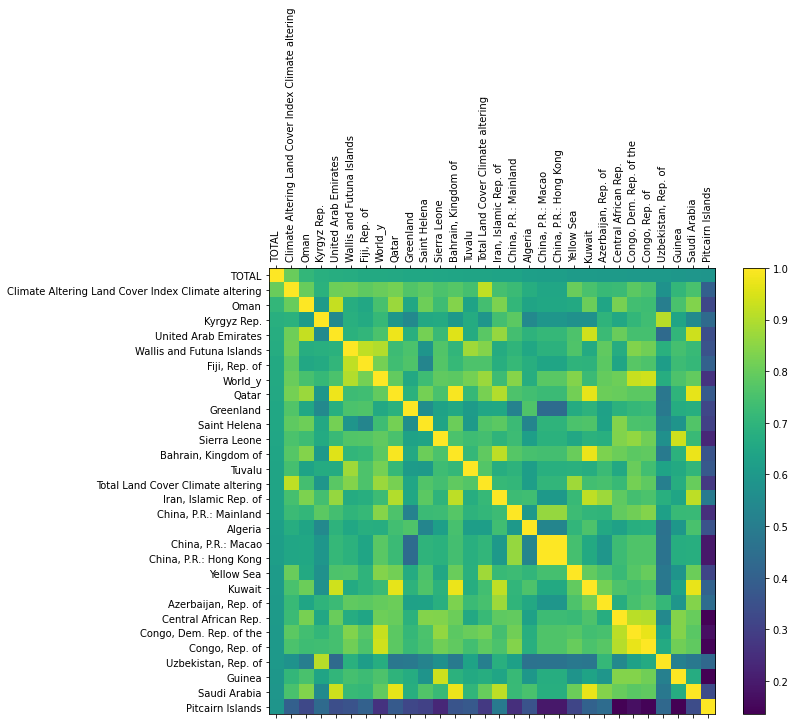

In [35]:
import matplotlib.pyplot as plt

corr_cols = df.drop(columns=['Year']).corr().loc[:,['TOTAL']].dropna().sort_values(by=['TOTAL'], ascending=False, axis=0).head(30).T.columns.tolist()
plt.figure(figsize=(10, 8))
plt.matshow(df.loc[:, corr_cols].corr(), fignum=1)
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)

plt.colorbar()
plt.show()